In [1]:
import pandas as pd
import datetime as dt
from dateutil.parser import parse
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import (Imputer, LabelEncoder, OneHotEncoder, StandardScaler)
%matplotlib inline
pd.options.mode.chained_assignment = None

In [2]:
# Read data
train = pd.read_csv("train.csv", header=0)
dog_breeds = pd.read_csv("dog_breeds.csv", header = 0)

In [3]:
#train

# Data preprocessing                        

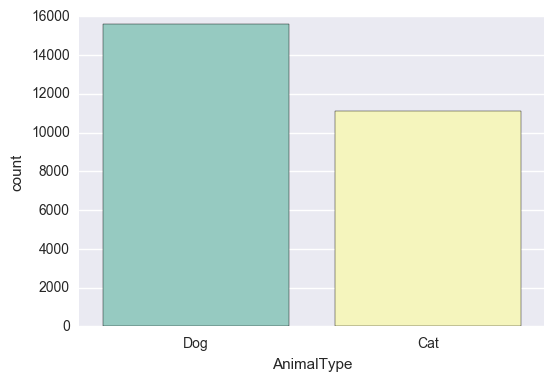

In [4]:
"""
Data of dogs: Subset data of dogs
"""
sns.countplot(train.AnimalType, palette='Set3')

In [5]:
#train.query("AnimalType == 'Dog'")
train = train[train['AnimalType'] == 'Dog']

# ----------------------Name----------------------
Objective: Non-metric variable: HasName (0: has name, 1: no name)


In [6]:
# Replace blank names with "Nameless"
train['Name'].fillna("Nameless", inplace = True)

In [7]:
# Define function
def hasName(name):
    if name == "Nameless":
        return 0
    else:
        return 1

In [8]:
# Apply function
train['HasName'] = train['Name'].apply(hasName)

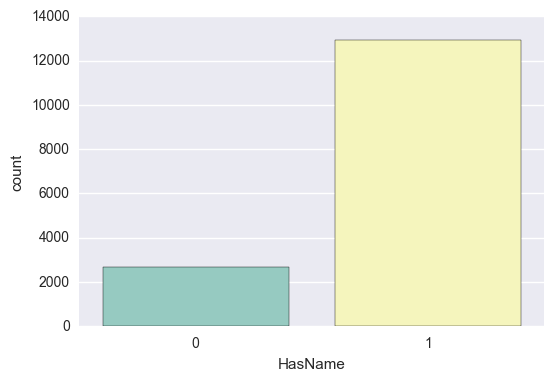

In [9]:
sns.countplot(train.HasName, palette='Set3')

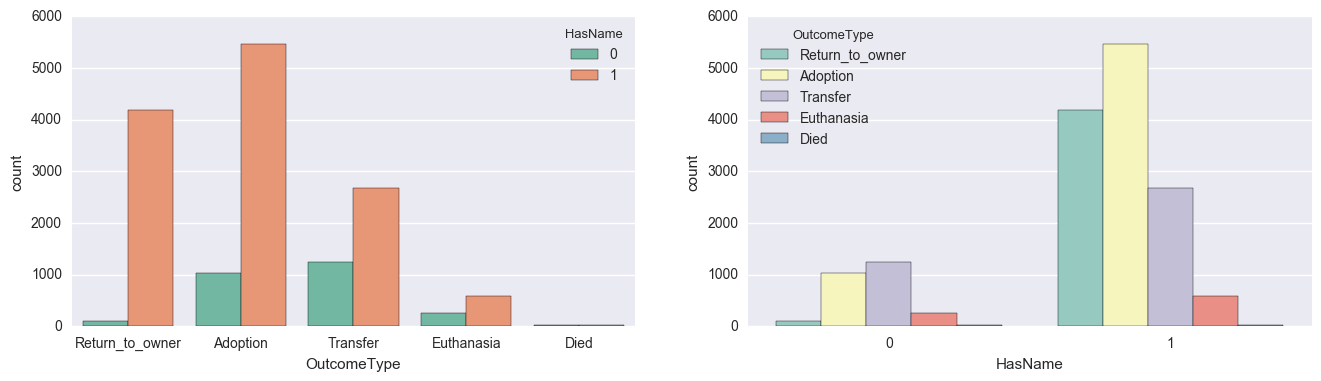

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=train, x='OutcomeType',hue='HasName', palette='Set2', ax=ax1)
sns.countplot(data=train, x='HasName',hue='OutcomeType', palette='Set3', ax=ax2)

# ----------------------DateTime----------------------
Objective:  Non metric variable: TimeofDay (morning, midday, lateday and night)
           Non metric variable: WeekDay (0, 1, 2, 3, 4, 5, 6)

In [11]:
# Define function
def time_of_day(x):
    x = str(x)
    time = x.split()[1]
    hour = int(time.split(":")[0])
    if hour >= 5 and hour < 11: return "morning"
    if hour >= 11 and hour < 16: return "midday"
    if hour >= 15 and hour < 20: return "lateday"
    else: return "night"

In [12]:
# Apply function
train['TimeofDay'] = train['DateTime'].apply(time_of_day)

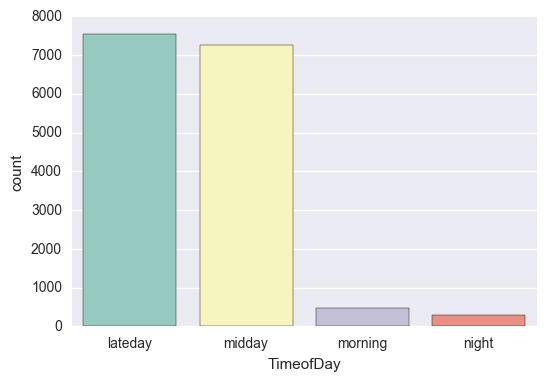

In [13]:
sns.countplot(train.TimeofDay, palette='Set3')

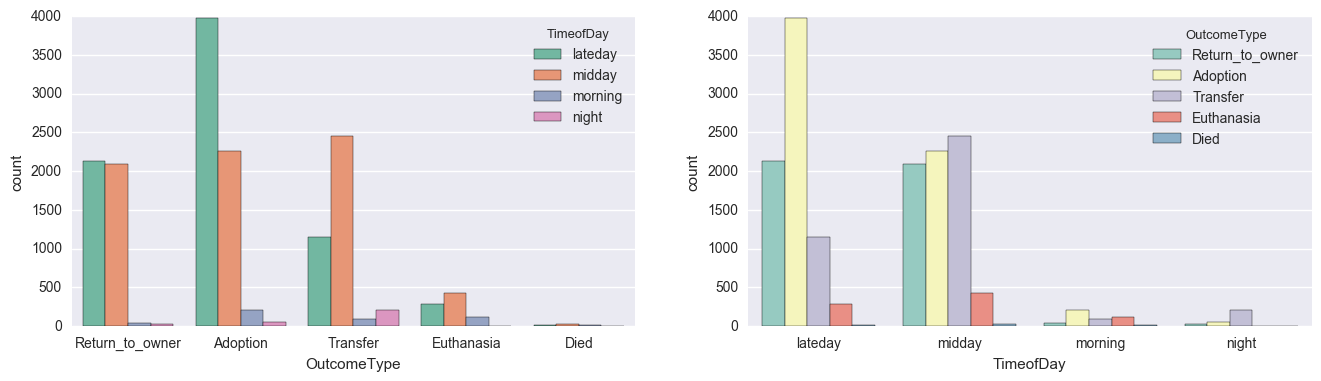

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=train, x='OutcomeType',hue='TimeofDay', palette='Set2', ax=ax1)
sns.countplot(data=train, x='TimeofDay',hue='OutcomeType', palette='Set3', ax=ax2)

In [15]:
train['DateTime'] = pd.to_datetime(train['DateTime'], errors='coerce')

In [16]:
train['WeekDay'] = train['DateTime'].dt.dayofweek

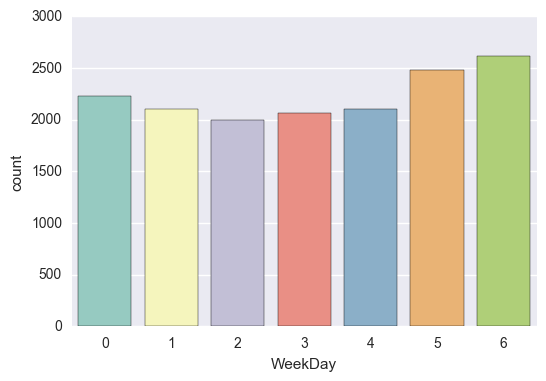

In [17]:
sns.countplot(train.WeekDay, palette='Set3')

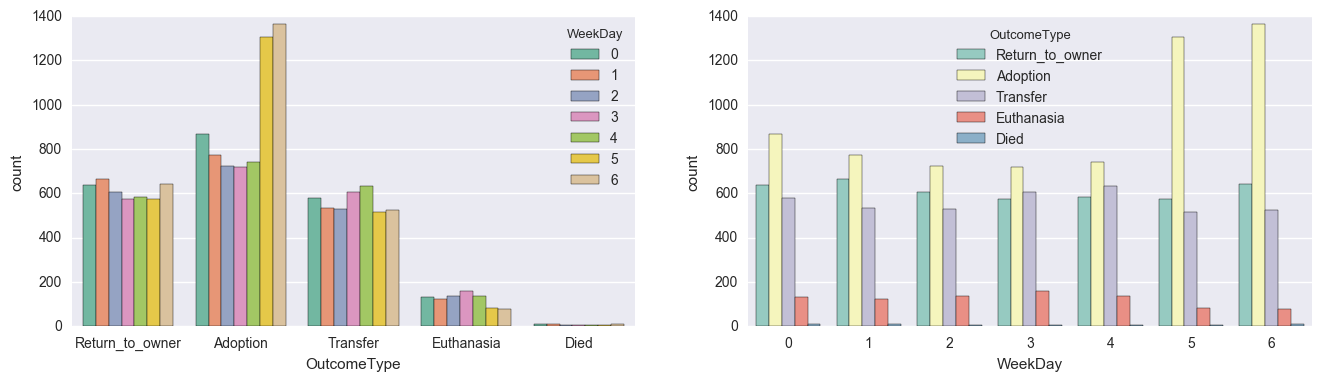

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=train, x='OutcomeType',hue='WeekDay', palette='Set2', ax=ax1)
sns.countplot(data=train, x='WeekDay',hue='OutcomeType', palette='Set3', ax=ax2)

# ----------------------OutcomeType----------------------
Objective: Non metric dependent variable Outcome (Return_to_owner, Adoption, Transfer, Euthanasia, Died)

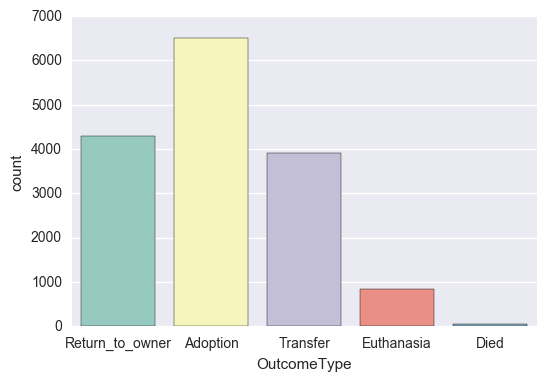

In [19]:
sns.countplot(train.OutcomeType, palette='Set3')
#plt.tight_layout(rect=[0,0,1,1], h_pad=0.0)
#plt.savefig("OutcomeType.png")

In [20]:
"""
# TODO: mapping
class_mapping = {label: idx for idx, label in enumerate(np.unique(train['OutcomeType']))}
class_mapping
train['OutcomeType'] = train['OutcomeType'].map(class_mapping)
"""

"\n# TODO: mapping\nclass_mapping = {label: idx for idx, label in enumerate(np.unique(train['OutcomeType']))}\nclass_mapping\ntrain['OutcomeType'] = train['OutcomeType'].map(class_mapping)\n"

# ----------------------OutcomeSubtype----------------------
Objective: Delete this unused variable

In [21]:
train.drop("OutcomeSubtype", axis=1, inplace=True)

# ----------------------SexuponOutcome----------------------
Objective:  Non metric variable: IsIntact (0: no, 1: yes)
            Non metric variable: Sex (Male, Female)

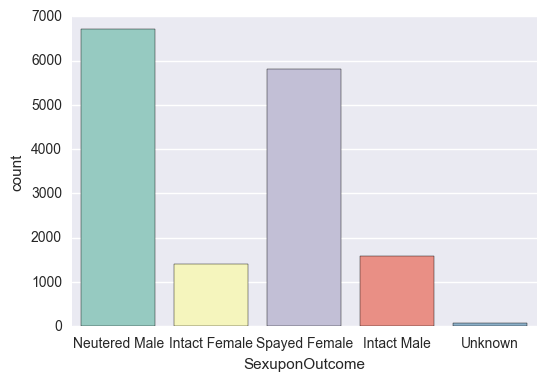

In [22]:
sns.countplot(train.SexuponOutcome, palette='Set3')

In [23]:
def getSex(x):
    x = str(x)
    if x.find('Male') >= 0: return "Male"
    if x.find('Female') >= 0: return "Female"
    #return "Unknown"
def getIntactness(x):
    x = str(x)
    if x.find('Neutered') >= 0: return 0
    if x.find('Spayed') >= 0: return 0
    if x.find('Intact') >= 0: return 1
    #return "Unknown"

In [24]:
train['SexuponOutcome'].unique()

array(['Neutered Male', 'Intact Female', 'Spayed Female', 'Intact Male',
       'Unknown', nan], dtype=object)

In [25]:
train['Sex'] = train['SexuponOutcome'].apply(getSex)
train['IsIntact'] = train['SexuponOutcome'].apply(getIntactness)

In [26]:
#train["Sex"].value_counts()
#train["IsIntact"].value_counts()

In [27]:
#train

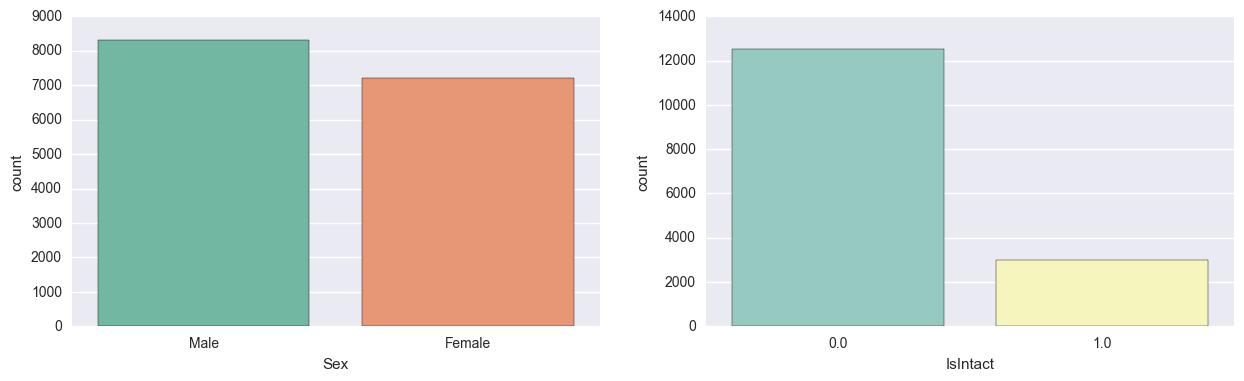

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
sns.countplot(train.Sex, palette='Set2', ax=ax1)
sns.countplot(train.IsIntact, palette='Set3', ax=ax2)

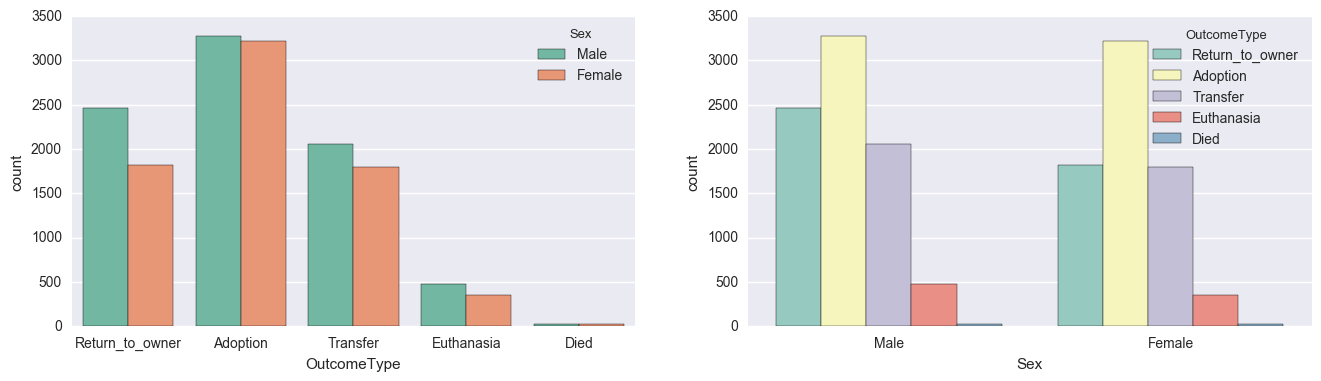

In [29]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=train, x='OutcomeType',hue='Sex', palette='Set2', ax=ax1)
sns.countplot(data=train, x='Sex',hue='OutcomeType', palette='Set3', ax=ax2)

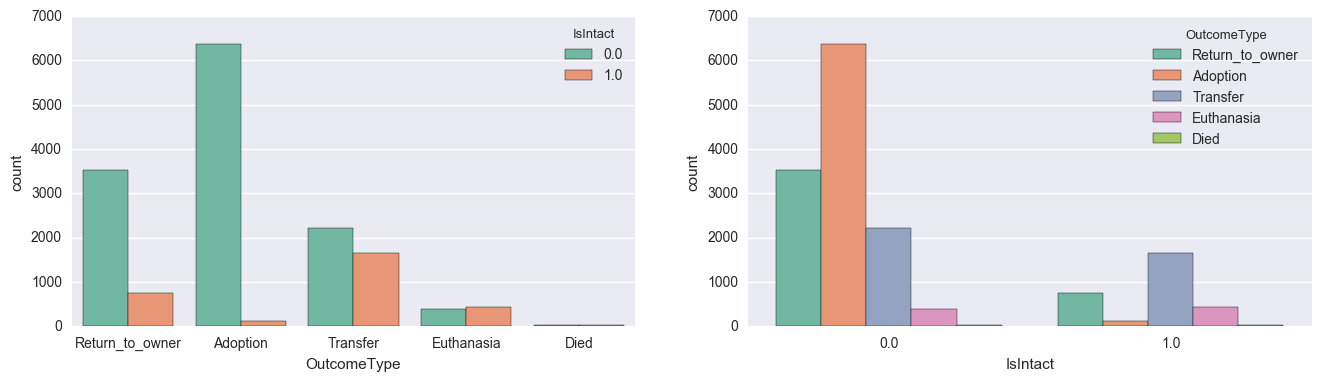

In [30]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=train, x='OutcomeType',hue='IsIntact', palette='Set2', ax=ax1)
sns.countplot(data=train, x='IsIntact',hue='OutcomeType', palette='Set2', ax=ax2)

# ----------------------AgeuponOutcome----------------------
Objective:  Metric variable: AgeinYears (age of animal)
            Non metric variable: Age (Juvenile, Adult, Old)

In [31]:
def calcAgeInYears(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year') > -1: return age 
    if x.find('month')> -1: return age / 12.
    if x.find('week')> -1: return age / 52.
    if x.find('day')> -1: return age / 365.
    else: return 0

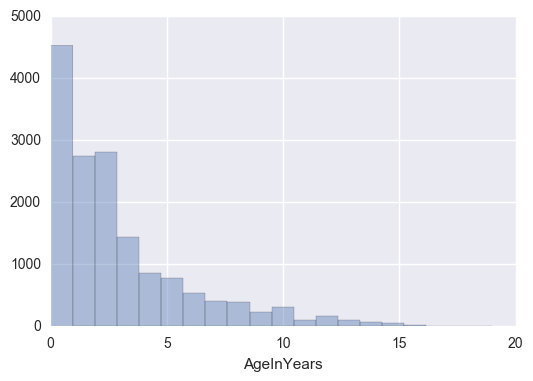

In [32]:
train['AgeInYears'] = train['AgeuponOutcome'].apply(calcAgeInYears)
sns.distplot(train.AgeInYears, bins = 20, kde=False)

In [33]:
def Age(x):
    if x <2: return "Juvenile"
    if x >= 2 and x <= 6: return "Adult"
    else: return "Old"

In [34]:
train["Age"] = train["AgeInYears"].apply(Age)

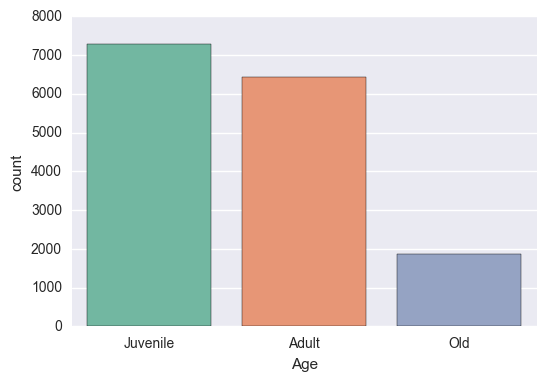

In [35]:
sns.countplot(train.Age, palette='Set2')

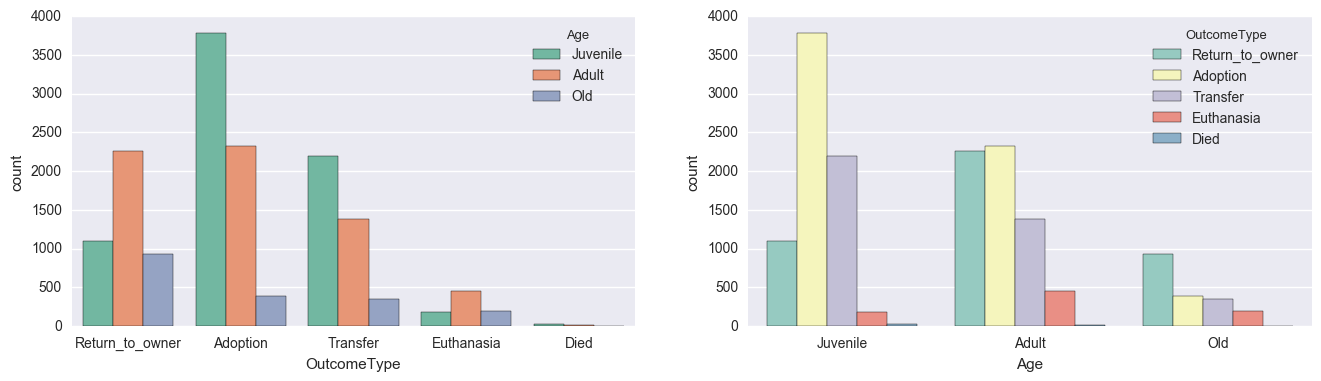

In [36]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=train, x='OutcomeType',hue='Age', palette='Set2', ax=ax1)
sns.countplot(data=train, x='Age',hue='OutcomeType', palette='Set3', ax=ax2)

# ----------------------Breed----------------------
Objective:  Non metric variable: IsMixBreed (0: no, 1: yes)
            Non metric variable: PureMixHybrid (Pure, Mix, Hybrid)
            Non metric variable: Group (Sporting, NonSporting, Hound, Working, Terrier, Toy, Herding, Pitbull)
            Non metric variable: Size (S, M, L and G)
Temperament Non metric variable: IsIntelligent (0: no, 1: yes)
            Non metric variable: IsAggressive (0: no, 1: yes)

In [37]:
def mixBreed(x):
    if x.find("Mix") >= 0: return 1
    else: return 0

In [38]:
train["IsMixBreed"] = train["Breed"].apply(mixBreed)

In [39]:
#train["IsMixBreed"].head

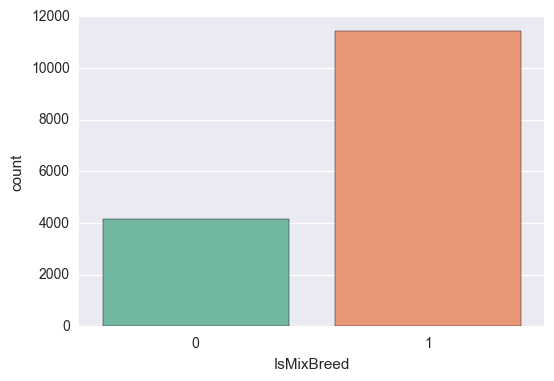

In [40]:
sns.countplot(train.IsMixBreed, palette='Set2')

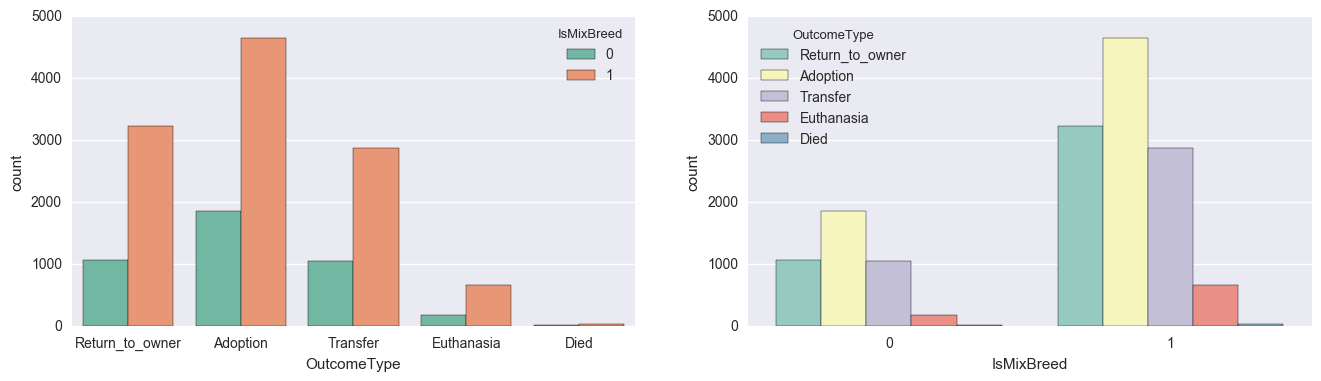

In [41]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=train, x='OutcomeType',hue='IsMixBreed', palette='Set2', ax=ax1)
sns.countplot(data=train, x='IsMixBreed',hue='OutcomeType', palette='Set3', ax=ax2)

In [42]:
def pure_mix_hybrid(x):
    if x.find("Mix") >= 0:
        return "Mix"
    elif x.find("/") >= 0:
        return "Hybrid"
    else:
        return "Pure"

In [43]:
train["PureMixHybrid"] = train["Breed"].apply(pure_mix_hybrid)

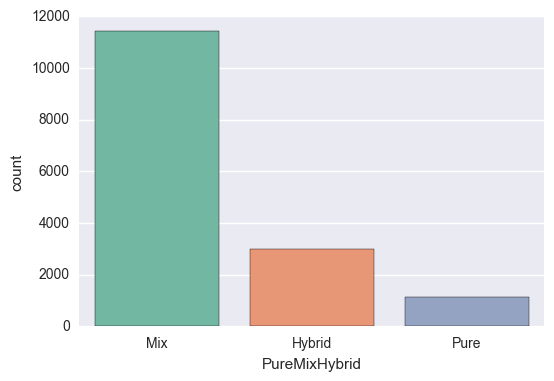

In [44]:
sns.countplot(train.PureMixHybrid, palette='Set2')

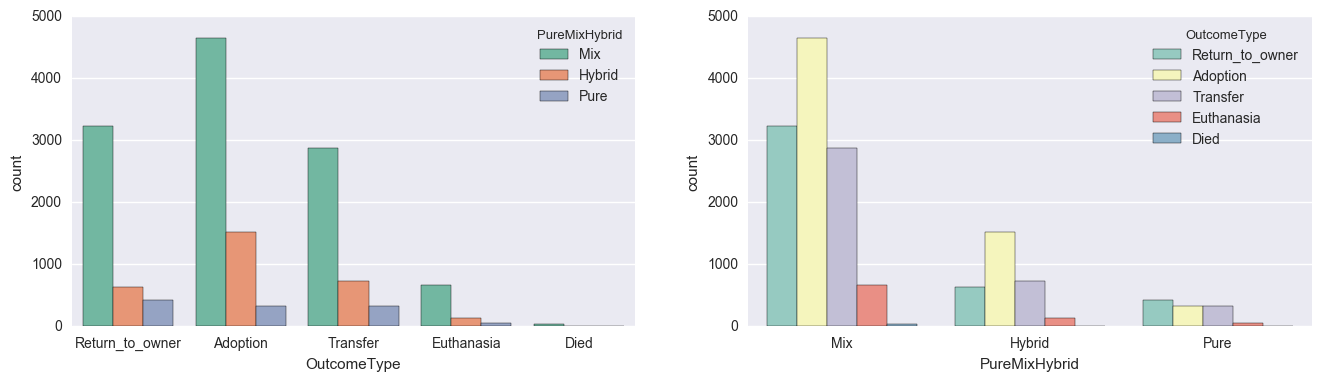

In [45]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=train, x='OutcomeType',hue='PureMixHybrid', palette='Set2', ax=ax1)
sns.countplot(data=train, x='PureMixHybrid',hue='OutcomeType', palette='Set3', ax=ax2)

In [46]:
# Keep simple and dominant breed
def keepSimpleBreed(x):
    if x.find("/") >= 0:
        x.split("/")
        x = x.split("/")[0]
    if x.find("Mix") >= 0:
        x = x[:-4]
    return x 

In [47]:
train["SimpleBreed"] = train["Breed"].apply(keepSimpleBreed)

In [48]:
#train["SimpleBreed"]

In [49]:
# Merge dataframe
Animals = pd.merge(train, dog_breeds, on='SimpleBreed', how = "left")

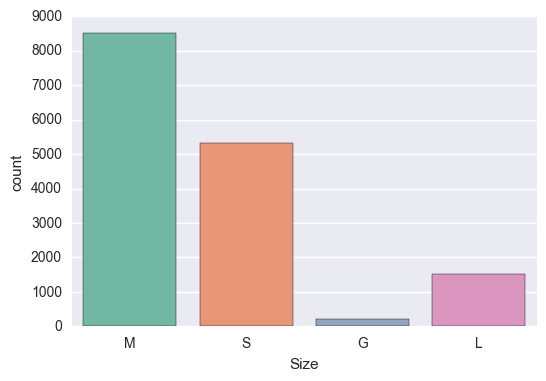

In [50]:
sns.countplot(Animals.Size, palette='Set2')

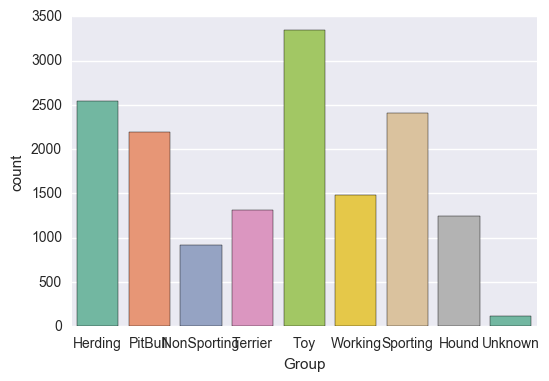

In [51]:
sns.countplot(Animals.Group, palette='Set2')

In [52]:
#Animals

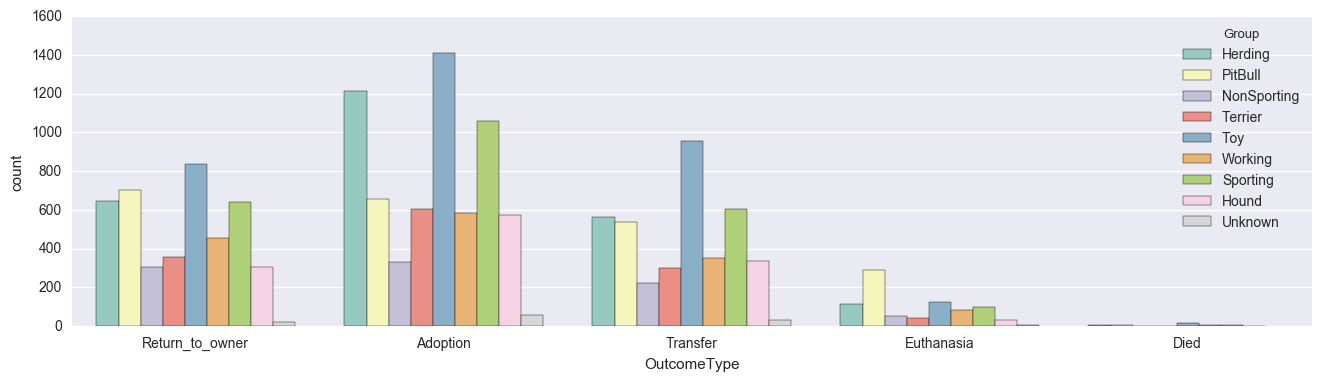

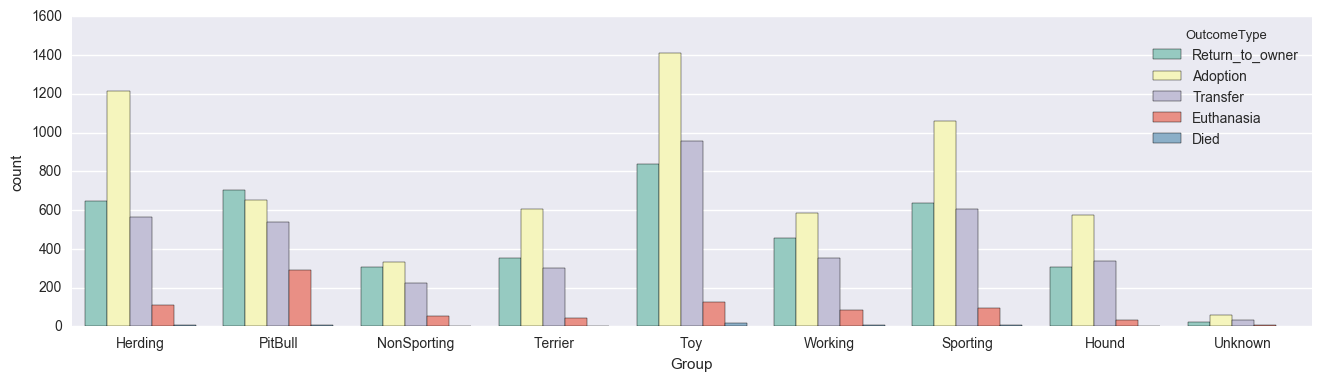

In [53]:
#f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
f, (ax1) = plt.subplots(1, 1, figsize=(16, 4))
sns.countplot(data=Animals, x='OutcomeType',hue='Group', palette='Set3', ax=ax1)
f, (ax2) = plt.subplots(1, 1, figsize=(16, 4))
sns.countplot(data=Animals, x='Group',hue='OutcomeType', palette='Set3', ax=ax2)

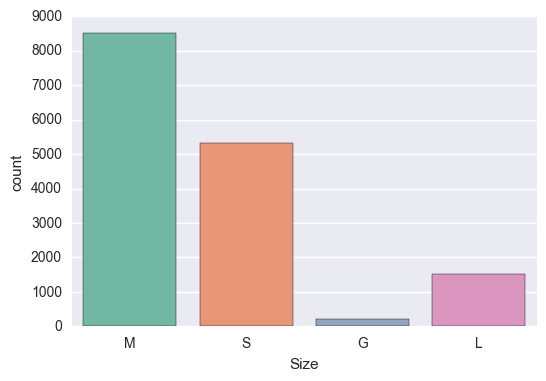

In [54]:
sns.countplot(Animals.Size, palette='Set2')

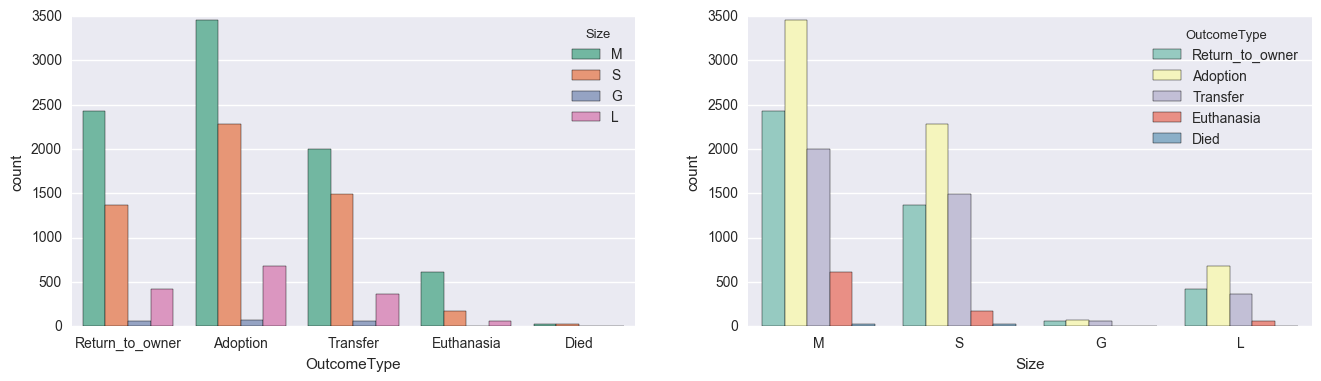

In [55]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=Animals, x='OutcomeType',hue='Size', palette='Set2', ax=ax1)
sns.countplot(data=Animals, x='Size',hue='OutcomeType', palette='Set3', ax=ax2)

# ----------------------Color----------------------
Objective: Non metric variable: IsMixColor (0: no, 1: yes)

In [56]:
def mixColor(x):
    x = str(x)
    if x.find("/") >= 0: return 1
    else: return 0

In [57]:
Animals["IsMixColor"] = Animals["Color"].apply(mixColor)

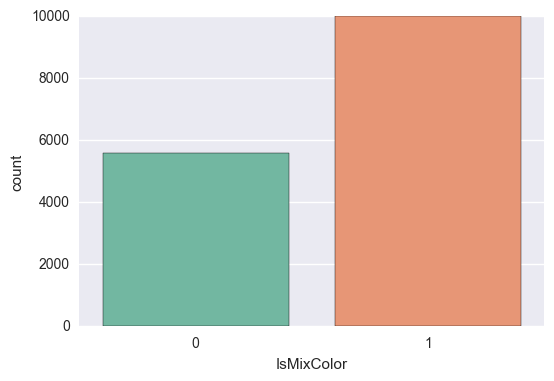

In [58]:
sns.countplot(Animals.IsMixColor, palette='Set2')

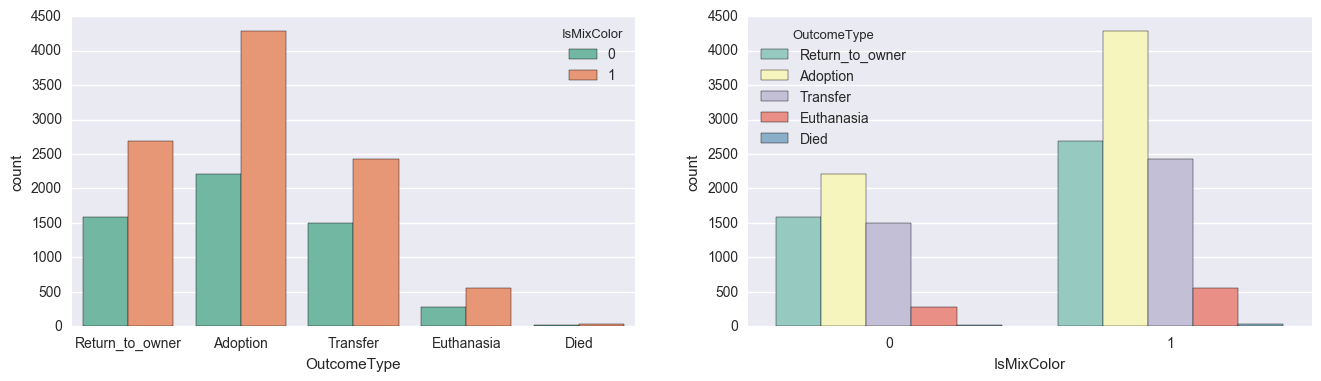

In [59]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=Animals, x='OutcomeType',hue='IsMixColor', palette='Set2', ax=ax1)
sns.countplot(data=Animals, x='IsMixColor',hue='OutcomeType', palette='Set3', ax=ax2)

In [60]:
def simpleColor(x):
    if x.find("/") >=0:
        return x.split("/")[0]
    else: return x

In [61]:
Animals["SimpleColor"] = Animals["Color"].apply(simpleColor)

In [62]:
#Animals["SimpleColor"].value_counts()

# ----------------------Check variables----------------------

In [63]:
#Animals["HasName"].unique()

In [64]:
#Animals["TimeofDay"].unique()

In [65]:
#Animals["WeekDay"].unique()

In [66]:
#Animals["OutcomeType"].unique()

In [67]:
#Animals["IsIntact"].unique()

In [68]:
#Animals["Sex"].unique()

In [69]:
#Animals["Age"].unique()

In [70]:
#Animals["IsMixBreed"].unique()

In [71]:
#Animals["MixorMultipleorSimple"].unique()

In [72]:
#Animals["Group"].unique()

In [73]:
#Animals["Size"].unique()

In [74]:
#Animals["IsIntelligent"].unique()

In [75]:
#Animals["IsAggressive"].unique()

In [76]:
#Animals["IsMixColor"].unique()

# ----------------------Delete missing values----------------------
Objectives: Delete categorical variable: SexuponOutcome --> IsIntact
            Delete categorical variable: Size

In [77]:
Animals.isnull().sum()

AnimalID           0
Name               0
DateTime           0
OutcomeType        0
AnimalType         0
SexuponOutcome     1
AgeuponOutcome     1
Breed              0
Color              0
HasName            0
TimeofDay          0
WeekDay            0
Sex               78
IsIntact          78
AgeInYears         0
Age                0
IsMixBreed         0
PureMixHybrid      0
SimpleBreed        0
Group             17
Size              17
IsMixColor         0
SimpleColor        0
dtype: int64

In [78]:
Animals = Animals.dropna()

In [79]:
#Animals.isnull().sum()

In [80]:
#Animals

In [81]:
# ----------------------Summarize variables----------------------

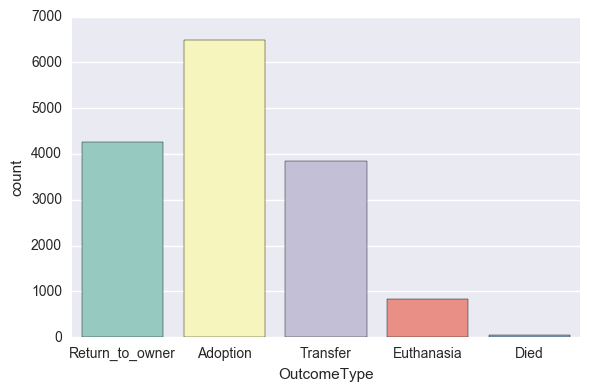

In [82]:
sns.countplot(Animals.OutcomeType, palette='Set3')
plt.tight_layout(rect=[0,0,1,1], h_pad=0.0)
plt.savefig("OutcomeType.png")

In [83]:
Animals.describe()

HasName       WeekDay     IsIntact    AgeInYears    IsMixBreed  \
count  15499.000000  15499.000000  15499.00000  15499.000000  15499.000000   
mean       0.832054      3.127879      0.19298      2.767794      0.733144   
std        0.373831      2.055221      0.39465      3.082728      0.442331   
min        0.000000      0.000000      0.00000      0.000000      0.000000   
25%        1.000000      1.000000      0.00000      0.750000      0.000000   
50%        1.000000      3.000000      0.00000      2.000000      1.000000   
75%        1.000000      5.000000      0.00000      4.000000      1.000000   
max        1.000000      6.000000      1.00000     19.000000      1.000000   

         IsMixColor  
count  15499.000000  
mean       0.642300  
std        0.479339  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [84]:
Animals["HasName"].value_counts()

1    12896
0     2603
Name: HasName, dtype: int64

In [85]:
Animals["TimeofDay"].value_counts()

lateday    7516
midday     7231
morning     471
night       281
Name: TimeofDay, dtype: int64

In [86]:
Animals['WeekDay'].value_counts()

6    2600
5    2469
0    2220
1    2098
4    2084
3    2044
2    1984
Name: WeekDay, dtype: int64

In [87]:
Animals['IsIntact'].value_counts()

0.0    12508
1.0     2991
Name: IsIntact, dtype: int64

In [88]:
Animals['Sex'].value_counts()

Male      8299
Female    7200
Name: Sex, dtype: int64

In [89]:
Animals['Age'].value_counts()

Juvenile    7206
Adult       6420
Old         1873
Name: Age, dtype: int64

In [90]:
Animals['PureMixHybrid'].value_counts()

Mix       11363
Hybrid     3005
Pure       1131
Name: PureMixHybrid, dtype: int64

In [91]:
Animals['Group'].value_counts()

Toy            3331
Herding        2539
Sporting       2388
PitBull        2190
Working        1468
Terrier        1305
Hound          1244
NonSporting     913
Unknown         121
Name: Group, dtype: int64

In [92]:
Animals['Size'].value_counts()

M    8463
S    5308
L    1520
G     208
Name: Size, dtype: int64

In [93]:
Animals['IsMixColor'].value_counts()

1    9955
0    5544
Name: IsMixColor, dtype: int64

# ----------------------Encode----------------------

In [94]:
label_name = "OutcomeType"
ordinal_features = ["Age", "Size"]
nominal_features = ["HasName","TimeofDay", "WeekDay", "IsIntact", "Sex", "IsMixBreed", "PureMixHybrid", "Group", "IsMixColor"]

In [95]:
# Encode dependence variable
le = LabelEncoder()
Animals[label_name] = le.fit_transform(Animals[label_name].values)
label_list = list(le.inverse_transform([0, 1, 2, 3, 4]))     # List of outcomes

In [96]:
# Map ordinal independence variable
age_mapping = {"Juvenile": 0, "Adult": 1, "Old": 2}
Animals["Age"] = Animals["Age"].map(age_mapping)

size_mapping = {'S': 0, 'M': 1, 'L': 2, 'G':3}
Animals['Size'] = Animals['Size'].map(size_mapping)

In [97]:
# One hot encoder for nominal features
Animals_encoded = pd.get_dummies(Animals, columns=nominal_features)

In [98]:
Animals_encoded

AnimalID        Name            DateTime  OutcomeType AnimalType  \
0      A671945     Hambone 2014-02-12 18:22:00            3        Dog   
1      A686464      Pearce 2015-01-31 12:28:00            0        Dog   
2      A667013    Nameless 2013-11-15 12:52:00            4        Dog   
3      A677334        Elsa 2014-04-25 13:04:00            4        Dog   
4      A671784        Lucy 2014-02-04 17:17:00            0        Dog   
5      A677747    Nameless 2014-05-03 07:48:00            0        Dog   
6      A666320    Nameless 2013-11-04 14:48:00            0        Dog   
7      A684601      Rocket 2016-02-03 11:27:00            0        Dog   
8      A704702     Scooter 2015-06-08 16:30:00            3        Dog   
9      A688584     Preston 2015-11-25 15:00:00            3        Dog   
10     A680028    Nameless 2014-06-07 12:54:00            4        Dog   
11     A684787        Kuma 2014-07-30 17:34:00            3        Dog   
12     A670658      Anders 2014-01-19 15:03:00            4        Dog   
13     A705262     Jamaica 2015-08-15 14:22:00            0        Dog   
14     A665781     Quattro 2013-10-28 16:32:00            0        Dog   
15     A676333     Trigger 2014-04-09 17:44:00            3        Dog   
16     A718832         Nia 2016-01-15 17:31:00            0        Dog   
17     A698777       Chloe 2015-03-25 18:50:00            0        Dog   
18     A707341      Murphy 2015-07-15 15:25:00            4        Dog   
19     A666825       Jesse 2013-11-08 13:24:00            3        Dog   
20     A699723     Delgado 2015-04-11 16:01:00            4        Dog   
21     A668626    Nameless 2013-12-06 14:55:00            2        Dog   
22     A657085    Pony Boy 2013-10-24 11:22:00            3        Dog   
23     A686716     Chester 2014-08-27 07:50:00            3        Dog   
24     A697852       Edith 2015-03-09 17:57:00            0        Dog   
25     A666092    Nameless 2013-10-30 15:37:00            2        Dog   
26     A701627        Gabe 2015-05-14 12:07:00            0        Dog   
27     A683443    Nameless 2014-07-18 16:23:00            4        Dog   
28     A597644        Lola 2014-09-16 14:05:00            3        Dog   
29     A682784       Sugar 2014-07-07 12:38:00            0        Dog   
...        ...         ...                 ...          ...        ...   
15565  A693469       Lucky 2014-12-08 17:47:00            3        Dog   
15566  A653309     Chester 2014-06-10 18:15:00            3        Dog   
15567  A689731    Nameless 2014-10-14 08:18:00            2        Dog   
15568  A696279     Bristol 2015-02-02 12:41:00            3        Dog   
15569  A667787    Nameless 2013-11-30 18:33:00            4        Dog   
15570  A718146        Nene 2015-12-22 15:21:00            3        Dog   
15571  A706601        Bevo 2015-07-01 16:05:00            3        Dog   
15572  A696282  Tinkerbell 2015-02-27 12:58:00            3        Dog   
15573  A715419     Brandon 2015-12-18 19:13:00            0        Dog   
15574  A670213        Izzy 2014-01-12 15:03:00            4        Dog   
15575  A696169      D.O.G. 2015-02-02 18:09:00            3        Dog   
15576  A695801        Lola 2015-02-02 14:56:00            4        Dog   
15577  A717094      Cookie 2015-12-02 12:02:00            2        Dog   
15578  A689845      Prieta 2014-10-12 18:28:00            3        Dog   
15579  A670305     Frances 2014-02-01 14:09:00            0        Dog   
15580  A687922    Achilles 2014-09-12 17:56:00            3        Dog   
15581  A676460       Mario 2014-04-21 14:01:00            2        Dog   
15582  A704999        Lion 2015-06-15 19:28:00            3        Dog   
15583  A678842        Ella 2014-06-15 17:41:00            4        Dog   
15584  A666920      Herbie 2013-11-13 17:32:00            4        Dog   
15585  A714386    Nameless 2015-10-24 00:00:00            0        Dog   
15586  A692622      Bonnie 2014-11-24 17:21:00            4        Dog   
15587  A66

In [99]:
# Subset numeric data
# TODO: Dont use variable "IsMixBreed"
#list_drop = ['AnimalID','Name','DateTime','AnimalType','SexuponOutcome','AgeuponOutcome','Breed','Color',
#             'AgeInYears','SimpleBreed', 'MixorMultipleorSimple_Mix', 'MixorMultipleorSimple_Multiple',
#             'MixorMultipleorSimple_Simple','SimpleColor']
list_drop = ['AnimalID','Name','DateTime','AnimalType','SexuponOutcome','AgeuponOutcome',
             'Breed','Color','AgeInYears','SimpleBreed', 'IsMixBreed_0', 'IsMixBreed_1','SimpleColor']
Animals_subset = Animals_encoded.drop(list_drop, 1)

In [100]:
#train = Animals_subset.drop(['OutcomeType'],1)

# ----------------------Write----------------------

In [101]:
train_data = Animals_subset.drop(['OutcomeType'],1)
train_label = Animals_subset["OutcomeType"]
with open("preprocessed_data.pkl", "wb") as f:
    pickle.dump(train_data, f, protocol=-1)
    pickle.dump(train_label, f, protocol=-1)
    pickle.dump(label_list, f, protocol=-1)

In [102]:
#train

In [103]:
Animals_subset

OutcomeType  Age  Size  HasName_0  HasName_1  TimeofDay_lateday  \
0                3    0     1        0.0        1.0                1.0   
1                0    1     1        0.0        1.0                0.0   
2                4    1     0        1.0        0.0                0.0   
3                4    0     0        0.0        1.0                0.0   
4                0    0     1        0.0        1.0                1.0   
5                0    0     0        1.0        0.0                0.0   
6                0    1     0        1.0        0.0                0.0   
7                0    1     1        0.0        1.0                0.0   
8                3    1     0        0.0        1.0                1.0   
9                3    0     3        0.0        1.0                0.0   
10               4    0     1        1.0        0.0                0.0   
11               3    0     1        0.0        1.0                1.0   
12               4    0     1        0.0        1.0                0.0   
13               0    1     2        0.0        1.0                0.0   
14               0    0     2        0.0        1.0                1.0   
15               3    0     2        0.0        1.0                1.0   
16               0    0     1        0.0        1.0                1.0   
17               0    1     0        0.0        1.0                1.0   
18               4    0     1        0.0        1.0                0.0   
19               3    1     2        0.0        1.0                0.0   
20               4    1     0        0.0        1.0                1.0   
21               2    1     1        1.0        0.0                0.0   
22               3    1     1        0.0        1.0                0.0   
23               3    2     0        0.0        1.0                0.0   
24               0    0     2        0.0        1.0                1.0   
25               2    1     1        1.0        0.0                0.0   
26               0    1     1        0.0        1.0                0.0   
27               4    0     0        1.0        0.0                1.0   
28               3    1     1        0.0        1.0                0.0   
29               0    1     0        0.0        1.0                0.0   
...            ...  ...   ...        ...        ...                ...   
15565            3    0     0        0.0        1.0                1.0   
15566            3    1     0        0.0        1.0                1.0   
15567            2    0     0        1.0        0.0                0.0   
15568            3    1     0        0.0        1.0                0.0   
15569            4    0     1        1.0        0.0                1.0   
15570            3    1     0        0.0        1.0                0.0   
15571            3    1     1        0.0        1.0                1.0   
15572            3    1     0        0.0        1.0                0.0   
15573            0    1     1        0.0        1.0                1.0   
15574            4    0     1        0.0        1.0                0.0   
15575            3    1     1        0.0        1.0                1.0   
15576            4    1     1        0.0        1.0                0.0   
15577            2    2     2        0.0        1.0                0.0   
15578            3    1     0        0.0        1.0                1.0   
15579            0    0     1        0.0        1.0                0.0   
15580            3    0     2        0.0        1.0                1.0   
15581            2    1     1        0.0        1.0                0.0   
15582            3    0     3        0.0        1.0                1.0   
15583            4    0     0        0.0        1.0                1.0   
15584            4    1     0        0.0        1.0                1.0   
15585            0    0     0        1.0        0.0                0.0   
15586            4    0     0        0.0        1.0                1.0   
15587      